In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras


In [3]:
def generate_time_series(batch_size,n_steps):
    freq1,freq2,offsets1,offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time - offsets1)*(freq1*10+10))
    series += 0.2*np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1*(np.random.rand(batch_size,n_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series =  generate_time_series(10000,n_steps+1)
X_train,y_train = series[:7000,:n_steps],series[:7000,-1]
X_valid,y_valid = series[7000:9000,:n_steps],series[7000:9000,-1]
X_test,y_test = series[9000:,:n_steps],series[9000:,-1]
X_train.shape,y_train.shape

((7000, 50, 1), (7000, 1))

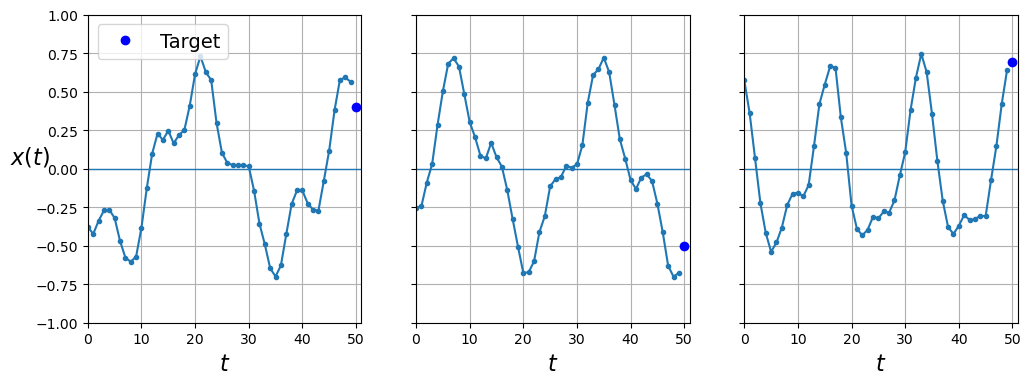

In [4]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
#save_fig("time_series_plot")
plt.show()

In [7]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='adam')
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 8s 16ms/step - loss: 0.1711 - val_loss: 0.0508
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0356 - val_loss: 0.0269
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0222 - val_loss: 0.0190
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0167 - val_loss: 0.0155
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0134
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0108 - val_loss: 0.0104
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0086 - val_loss: 0.0082
Epoch 10/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0077 - val_loss: 0.007

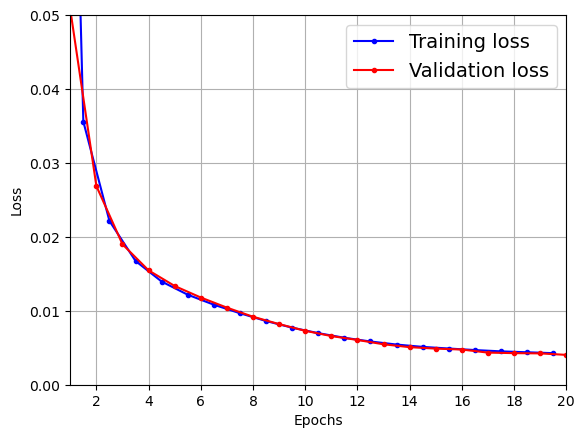

In [10]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [13]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 7s 19ms/step - loss: 0.0534 - val_loss: 0.0261
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0204 - val_loss: 0.0164
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0142 - val_loss: 0.0125
Epoch 4/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 5/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0086
Epoch 6/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0079 - val_loss: 0.0073
Epoch 7/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 8/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 9/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 10/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0050 - val_loss

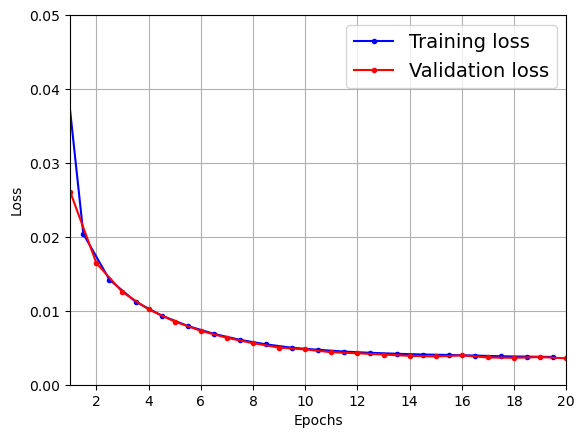

In [15]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [19]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None,1])
])
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse",optimizer=optimizer)
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
219/219 [==============================] - 15s 47ms/step - loss: 0.6886 - val_loss: 0.3424
Epoch 2/20
219/219 [==============================] - 10s 46ms/step - loss: 0.2185 - val_loss: 0.1486
Epoch 3/20
219/219 [==============================] - 9s 42ms/step - loss: 0.1467 - val_loss: 0.1582
Epoch 4/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1460 - val_loss: 0.1472
Epoch 5/20
219/219 [==============================] - 10s 46ms/step - loss: 0.1481 - val_loss: 0.1516
Epoch 6/20
219/219 [==============================] - 9s 43ms/step - loss: 0.1311 - val_loss: 0.0905
Epoch 7/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0599 - val_loss: 0.0461
Epoch 8/20
219/219 [==============================] - 11s 52ms/step - loss: 0.0378 - val_loss: 0.0332
Epoch 9/20
219/219 [==============================] - 10s 44ms/step - loss: 0.0292 - val_loss: 0.0267
Epoch 10/20
219/219 [==============================] - 8s 37ms/step - loss: 0.0243 - v

63/63 [==============================] - 3s 33ms/step - loss: 0.0109


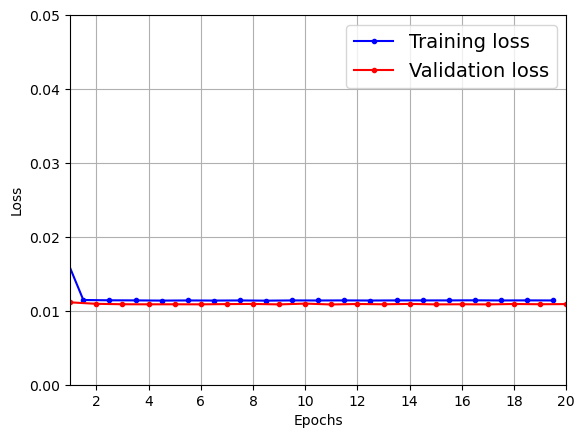

63/63 [==============================] - 1s 15ms/step


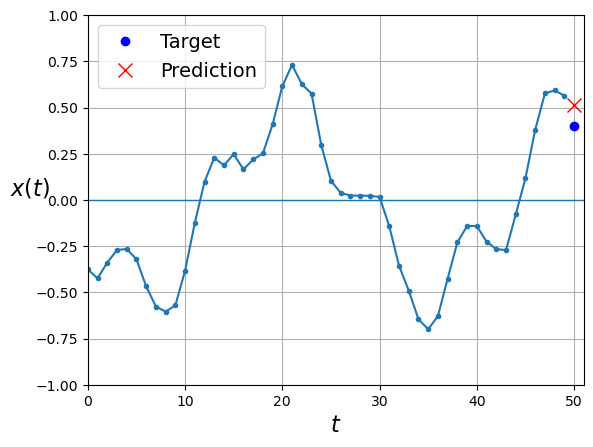

In [18]:
model.evaluate(X_valid, y_valid)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.model.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))

In [21]:
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)])

model.compile(loss="mse",optimizer="adam")
history = model.fit(X_train,y_train,epochs=20,
                    validation_data=(X_valid,y_valid))


TypeError: ('Keyword argument not understood:', 'retunr_sequences')